In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
dataframe_csv = pd.read_csv('data-processed/measurements2_clean_withoutna.csv')

In [15]:
dataframe_csv.shape

(388, 9)

In [16]:
dataframe_csv.dtypes

distance    float64
consume     float64
speed         int64
t_in        float64
t_out         int64
gas          object
ac            int64
rain          int64
sun           int64
dtype: object

In [17]:
'https://medium.com/geekculture/intro-to-data-visualization-using-seaborn-and-matplotlib-9a9b9ea532f'

'https://medium.com/geekculture/intro-to-data-visualization-using-seaborn-and-matplotlib-9a9b9ea532f'

In [18]:
df = dataframe_csv.copy()

<AxesSubplot:>

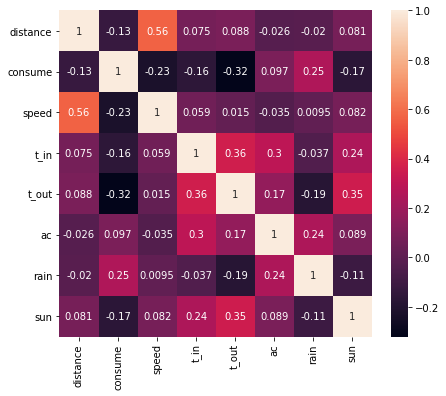

In [19]:
corr = df.corr()
plt.figure(figsize=(7,6))
sns.heatmap(data=corr, annot=True)

In [20]:
df_numerics_only = df.select_dtypes(include=np.number)

In [21]:
df_numerics_only

,distance,consume,speed,t_in,t_out,ac,rain,sun
0,28.0,5.0,26,21.5,12,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0
...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,0,0,0
384,16.1,4.3,38,25.0,31,1,0,0
385,16.0,3.8,45,25.0,19,0,0,0
386,15.4,4.6,42,25.0,31,1,0,0


<AxesSubplot:xlabel='distance', ylabel='consume'>

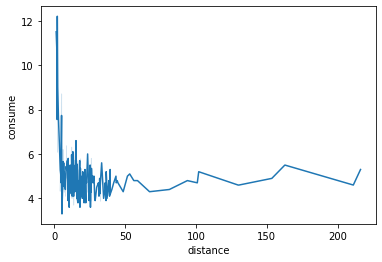

In [22]:
sns.lineplot(x= "distance", y="consume", data=df_numerics_only)

In [27]:
df_numerics_only.describe()

,distance,consume,speed,t_in,t_out,ac,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.931701,11.358247,0.077320,0.123711,0.082474
std,22.667837,1.033172,13.598524,0.994741,6.991542,0.267443,0.329677,0.275441
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='distance', ylabel='count'>

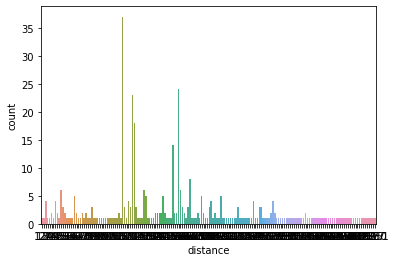

In [28]:
sns.countplot(x=df_numerics_only.distance)

In [47]:
df_numerics_only.distance.value_counts().head(15)

11.8    37
16.0    24
12.3    23
12.4    18
15.4    14
16.6     8
16.1     6
12.9     6
4.9      6
14.2     5
19.0     5
6.1      5
13.0     5
17.3     5
25.9     4
Name: distance, dtype: int64

<AxesSubplot:xlabel='distance', ylabel='Count'>

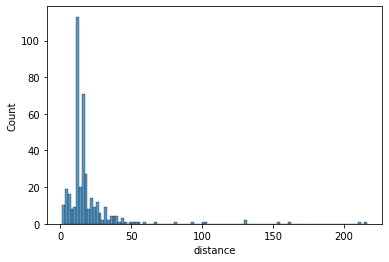

In [48]:
sns.histplot(x=df_numerics_only.distance)

In [61]:
df = df[df["distance"]<=60].reset_index(drop=True)

<AxesSubplot:xlabel='distance', ylabel='Count'>

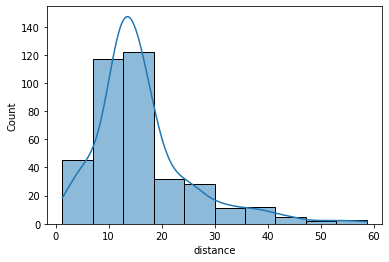

In [65]:
sns.histplot(df.distance,kde=True, bins=10)

In [79]:
df['gas_dums'] = df.gas.apply(lambda x: '1' if x =='SP98' else '0')
df.gas_dums = df.gas_dums.astype(dtype='int64')
df.dtypes

distance    float64
consume     float64
speed         int64
t_in        float64
t_out         int64
gas          object
ac            int64
rain          int64
sun           int64
gas_dums      int64
dtype: object

<AxesSubplot:>

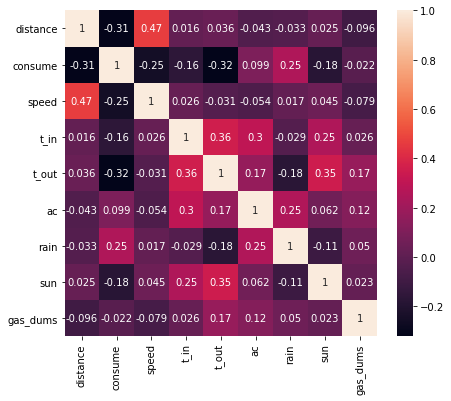

In [80]:
corr = df.corr()
plt.figure(figsize=(7,6))
sns.heatmap(data=corr, annot=True)

In [81]:
df.to_csv('data-processed/measurements2_clean_withoutna_withdummies.csv', index=False)

In [34]:
import datetime
x = datetime.datetime.now()

In [35]:
x

datetime.datetime(2021, 5, 27, 22, 3, 5, 748259)

In [36]:
import arrow

In [39]:
arnow = arrow.utcnow()

In [59]:
arnow

<Arrow [2021-05-27T20:23:23.752486+00:00]>

In [60]:
ar_local = arnow.to("Europe/Madrid")

In [61]:
otherday = ar_local.dehumanize('3 days ago')

In [62]:
otherday

<Arrow [2021-05-24T22:23:23.752486+02:00]>

In [47]:
otherweek = ar_local.dehumanize('1 week ago')

ValueError: Input string not valid. Note: Some locales do not support the week granulairty in Arrow.
                 If you are attempting to use the week granularity on an unsupported locale, this could be the cause of this error.

In [49]:
ar_local

<Arrow [2021-05-27T22:23:23.752486+02:00]>

In [51]:
ar_local.date()

datetime.date(2021, 5, 27)

In [63]:
arnow = arrow.utcnow()

In [68]:
today =  arrow.utcnow().to("Europe/Madrid").strftime('%d/%m/%Y')
today

In [74]:
now = arrow.utcnow().to("Europe/Madrid")
now

<Arrow [2021-05-27T22:46:05.502621+02:00]>

In [96]:
import arrow
now = arrow.utcnow().to("Europe/Madrid")
now

<Arrow [2021-05-27T23:14:20.680444+02:00]>

In [97]:
otherday = now.dehumanize('3 days ago')
otherhour = now.dehumanize('1 hours ago')
otherweek = now.dehumanize('1 weeks ago')
print(otherday)
print(otherhour)
print("\n")
print(now.strftime('%d/%m/%Y'))
print(otherday.strftime('%d/%m/%Y'))
print(otherhour.strftime('%d/%m/%Y'))
print(otherweek.strftime('%d/%m/%Y'))

2021-05-24T23:14:20.680444+02:00
2021-05-27T22:14:20.680444+02:00


27/05/2021
24/05/2021
27/05/2021
20/05/2021


In [104]:
strng = '1 hour ago'
strng.split(" ")[1]
if 's' in strng.split(" ")[1]:
    print('plural')
else:
    strng.split(" ")[1]+ 's'

'hour'

In [113]:
def autof(strng):
    bits = strng.split(" ")
    print(bits)
    fragment = strng.split(" ")[1]
    if 's' in fragment:
        print(fragment, 'is plural')
    else:
        print(fragment+'s' )
        new_strng = bits[0]+bits[1]+'s'+bits[2]
        new2_strng = strng.replace(fragment,fragment+'s')
        print(new_strng)
        print(new2_strng)

In [114]:
autof('1 hour ago')

['1', 'hour', 'ago']
hours
1hoursago
1 hours ago


In [122]:
import arrow
def autof(strng):
    now = arrow.utcnow().to("Europe/Madrid")
    fragment = strng.split(" ")[1]
    if 's' in fragment:
        pass
    else:
        strng = strng.replace(fragment,fragment+'s')
    print(strng)
    answ = now.dehumanize(strng).strftime('%d/%m/%Y')
    print('this happened: ', answ)

In [139]:
import arrow
def autocorrect(text):
    now = arrow.utcnow().to( "Europe/Madrid")
    fragment= text.split(" ")[1]
    if 's' in fragment:
        pass
    else:
        text = text.replace(fragment,fragment+'s')
    answ = now.dehumanize(text).strftime('%d/%m/%Y')
    print(now)
    return answ

In [140]:
autocorrect ( "1 hour ago")

2021-05-27T23:39:00.610405+02:00


'27/05/2021'

In [85]:
pastweek = now.shift(hours=1)
pastweek.dehumanize(now,granularity="hours")

TypeError: dehumanize() got an unexpected keyword argument 'granularity'

In [86]:
otherweek = now.dehumanize('1 hours ago')

In [87]:
otherweek

<Arrow [2021-05-27T21:46:05.502621+02:00]>

In [142]:
from pathlib import Path

In [151]:
dataset = Path.cwd().parent/'adult.data'
dataset.is_file()

True

In [153]:
import numpy as np
import pandas as pd
dataset = Path.cwd().parent/'adult.data'
col_names = ['age','workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
           'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
           'hours_per_week', 'native_country', 'wage_class']
df= pd.read_csv(dataset, skipinitialspace=True, names = col_names, index_col=False)

In [154]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [168]:
df.wage_class.dtype

dtype('O')

In [164]:
df.shape

(32561, 15)

In [ ]:
df[(df['MRP'] <= 2000) & (df['Discount'] > 0)]

In [155]:
df.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [157]:
df[(df['sex']=='Female')].mean()

age                   36.858230
fnlwgt            185746.311206
education_num         10.035744
capital_gain         568.410547
capital_loss          61.187633
hours_per_week        36.410361
dtype: float64

In [162]:
germs= df[(df['native_country']=='Germany')]

In [167]:
(len(germs)/(len(df)))*100

0.42074874850281013

In [165]:
germs.shape

(137, 15)

In [169]:
df.wage_class.value_counts()

<=50K    24720
>50K      7841
Name: wage_class, dtype: int64

In [175]:
rich = df[(df['wage_class']=='>50K')]

In [176]:
type(rich)

pandas.core.frame.DataFrame

In [177]:
rich.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,7841.000000,7.841000e+03,7841.000000,7841.000000,7841.000000,7841.000000
mean,44.249841,1.880050e+05,11.611657,4006.142456,195.001530,45.473026
std,10.519028,1.025418e+05,2.385129,14570.378951,595.487574,11.012971
min,19.000000,1.487800e+04,2.000000,0.000000,0.000000,1.000000
25%,36.000000,1.191010e+05,10.000000,0.000000,0.000000,40.000000
50%,44.000000,1.761010e+05,12.000000,0.000000,0.000000,40.000000
75%,51.000000,2.309590e+05,13.000000,0.000000,0.000000,50.000000
max,90.000000,1.226583e+06,16.000000,99999.000000,3683.000000,99.000000


In [178]:
poor = df[(df['wage_class']=='<=50K')]

In [179]:
poor.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,24720.000000,2.472000e+04,24720.000000,24720.000000,24720.000000,24720.000000
mean,36.783738,1.903409e+05,9.595065,148.752468,53.142921,38.840210
std,14.020088,1.064823e+05,2.436147,963.139307,310.755769,12.318995
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,25.000000,1.176060e+05,9.000000,0.000000,0.000000,35.000000
50%,34.000000,1.794650e+05,9.000000,0.000000,0.000000,40.000000
75%,46.000000,2.390230e+05,10.000000,0.000000,0.000000,40.000000
max,90.000000,1.484705e+06,16.000000,41310.000000,4356.000000,99.000000


In [210]:
rich.education.value_counts().sum()

7841

In [209]:
2221+423+361+265+959+306

4535

In [212]:
(4535/7841)*100

57.83701058538452

In [181]:
poor.education.value_counts()

HS-grad         8826
Some-college    5904
Bachelors       3134
11th            1115
Assoc-voc       1021
10th             871
Assoc-acdm       802
Masters          764
7th-8th          606
9th              487
12th             400
5th-6th          317
1st-4th          162
Prof-school      153
Doctorate        107
Preschool         51
Name: education, dtype: int64

In [183]:
df[(df['sex']=='Male')& (df['race']=='Amer-Indian-Eskimo')].max()

age                               82
workclass                  State-gov
fnlwgt                        356015
education               Some-college
education_num                     16
marital_status               Widowed
occupation          Transport-moving
relationship               Unmarried
race              Amer-Indian-Eskimo
sex                             Male
capital_gain                   27828
capital_loss                    1980
hours_per_week                    84
native_country         United-States
wage_class                      >50K
dtype: object

In [184]:
rich['marital_status'].value_counts()

Married-civ-spouse       6692
Never-married             491
Divorced                  463
Widowed                    85
Separated                  66
Married-spouse-absent      34
Married-AF-spouse          10
Name: marital_status, dtype: int64

In [194]:
poor = df[(df['wage_class']=='<=50K')]
poor

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [195]:
df['hours_per_week'].max()

99

In [196]:
len(df[(df['hours_per_week']==99)])

85

In [200]:
len(df[(df['hours_per_week']==99) & (df['wage_class']=='>50K')])

25

In [202]:
(25/85)*100

29.411764705882355

In [203]:
japs = df[(df['native_country']=='Japan')]

In [204]:
japs.

43.693548387096776

In [207]:
df[(df['native_country']=='Japan') & (df['wage_class']=='>50K')].hours_per_week.mean()

47.958333333333336

In [208]:
df[(df['native_country']=='Japan') & (df['wage_class']=='<=50K')].hours_per_week.mean()

41.0